In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
experiencia = pd.Series([1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,
                        4.9,5.1,5.3,5.9,6.0,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5])

salario = pd.Series([39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 
                    60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 
                    56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 
                    81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 
                    109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00])

df = pd.DataFrame({'experiencia' : experiencia, 'salario' : salario})

In [ ]:
sns.displot(salario, bins=10)
plt.show()

In [ ]:
sns.displot(experiencia, bins=10)
plt.show()

In [13]:
np.corrcoef(df['experiencia'], df['salario'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

<AxesSubplot: >

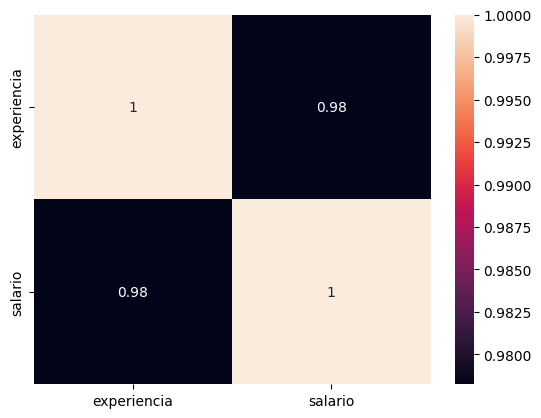

In [15]:
sns.heatmap(df.corr(), annot=True) 

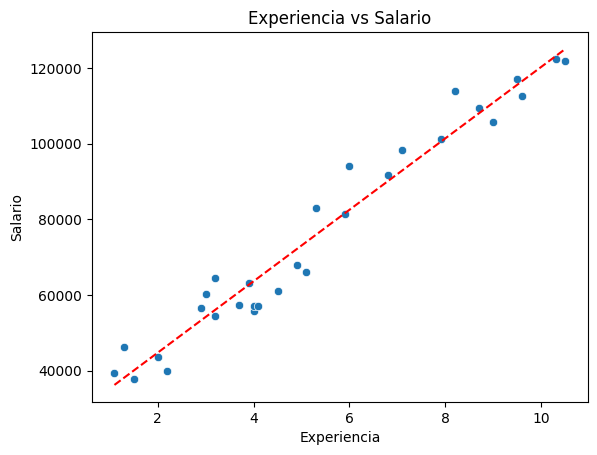

In [18]:
sns.scatterplot(x="experiencia", y="salario", data=df)
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario')

z = np.polyfit(df['experiencia'], df['salario'], 1)
p = np.poly1d(z)
plt.plot(df['experiencia'],p(df['experiencia']),"r--")
plt.show()
plt.show()

In [7]:
print('Maximo valor {}'.format(df['salario'].max()))
print(f'Minimo valor {df.salario.min()}')
print('Media {}'.format(df['salario'].mean()))
print('Mediana {}'.format(df['salario'].median()))
print('Desviacion estandar {}'.format(df['salario'].std()))

Maximo valor 122391.0
Minimo valor 37731.0
Media 76003.0
Mediana 65237.0
Desviacion estandar 27414.4297845823


In [16]:
x_experiencia = df.experiencia
y_salario = df.salario
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_experiencia, y_salario, test_size=0.2, random_state=42)
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


x_train:  (24,)
x_test:  (6,)
y_train:  (24,)
y_test:  (6,)


In [17]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [ ]:
lin_reg_model.predict